# Zadanie 1

In [21]:
using QuadGK
using Polynomials
using Plots

In [22]:
function legender(n)
    if(n == 0)
        return (x -> 1.0)
    end
    if(n == 1)
        return (x -> x)
    end
    return (x -> ((2*(n - 1) + 1)/(n)*x*(legender(n-1))(x) - (n - 1)/(n)*(legender(n-2))(x)))
end

legender (generic function with 1 method)

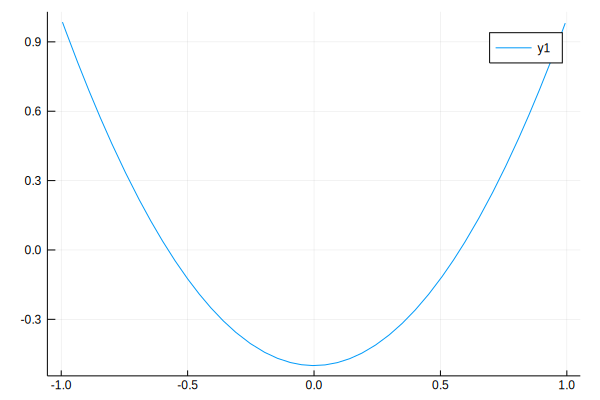

In [23]:
plot(legender(2), -1, 1)

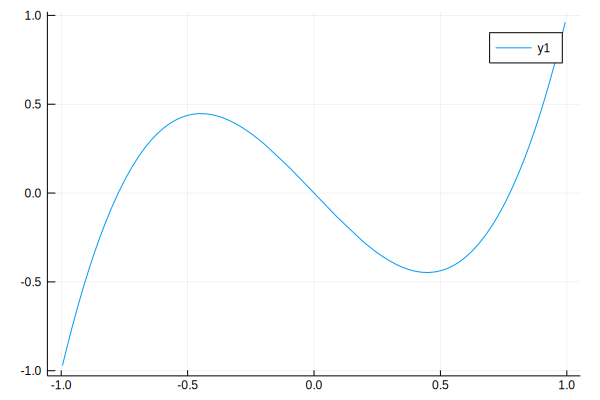

In [24]:
plot(legender(3), -1, 1)

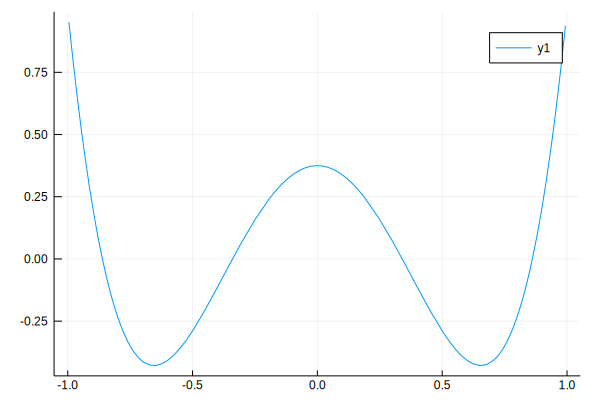

In [25]:
plot(legender(4), -1, 1)

In [26]:
function legender_coefficients(ki)
    k = ki + 1
    res = Array{Poly, 1}(undef, k)
    res[1] = Poly([1])
    res[2] = Poly([0,1])
    for i = 3:k
        res[i] = res[i-1]*Poly([0, 1])*(2(i-2) + 1) / (i-1) - (i-2)/(i-1)*res[i-2] 
    end
    res[k]
end

legender_coefficients (generic function with 1 method)

In [27]:
legender_coefficients(4)

Poly(0.375 - 3.75*x^2 + 4.375*x^4)

In [28]:
roots( legender_coefficients(2) ), gauss(2)

([-0.57735, 0.57735], ([-0.57735, 0.57735], [1.0, 1.0]))

In [29]:
roots( legender_coefficients(3) ), gauss(3)

([-0.774597, 0.774597, 0.0], ([-0.774597, 0.0, 0.774597], [0.555556, 0.888889, 0.555556]))

In [30]:
roots( legender_coefficients(4) ), gauss(4)

([-0.861136, 0.861136, -0.339981, 0.339981], ([-0.861136, -0.339981, 0.339981, 0.861136], [0.347855, 0.652145, 0.652145, 0.347855]))

# Zadanie 2

In [31]:
function gaussie(f, k)
    (xp,a)=gauss(k)
    sum(a .* f.(xp))
end

gaussie (generic function with 1 method)

In [32]:
function f(i)
    if(i == 1)
        return x -> x
    else
        return x -> x*(f(i-1))(x)
    end
end

f (generic function with 1 method)

In [33]:
for i = 20:-1:1
    print(i)
    print(" ")
    println(gaussie(f(20), i))
end

20 0.09523809523809533
19 0.09523809523809534
18 0.09523809523809529
17 0.09523809523809526
16 0.09523809523809533
15 0.09523809523809534
14 0.09523809523809529
13 0.09523809523809511
12 0.09523809523809532
11 0.0952380952380952
10 0.09523516964776454
9 0.09518280330177986
8 0.09474699295632082
7 0.09252257541458862
6 0.08481758799621952
5 0.06606306950648799
4 0.03498372981825395
3 0.006718464000000004
2 3.387017561686066e-5
1 0.0


# Zadanie 3

In [34]:
function gaussieNormalized(f, k, a, b)
    (xp,y)=gauss(k)
     s = sum(y .* f.((b-a)/2*xp .+ (a+b)/2))
    ((b-a)/2) * s
end

gaussieNormalized (generic function with 1 method)

In [42]:
for i = 1:20
    print(1/(i+1))
    print(" ")
    println(gaussieNormalized(f(i), 15, 0, 1))
end

0.5 0.5000000000000001
0.3333333333333333 0.3333333333333334
0.25 0.25000000000000006
0.2 0.2000000000000001
0.16666666666666666 0.16666666666666677
0.14285714285714285 0.14285714285714296
0.125 0.1250000000000001
0.1111111111111111 0.1111111111111112
0.1 0.10000000000000009
0.09090909090909091 0.090909090909091
0.08333333333333333 0.08333333333333341
0.07692307692307693 0.07692307692307701
0.07142857142857142 0.07142857142857151
0.06666666666666667 0.06666666666666675
0.0625 0.06250000000000008
0.058823529411764705 0.05882352941176479
0.05555555555555555 0.05555555555555563
0.05263157894736842 0.0526315789473685
0.05 0.05000000000000007
0.047619047619047616 0.047619047619047686


# Zadanie 4

In [36]:
quadgk(x -> x^2, 0, 1)

(0.3333333333333333, 5.551115123125783e-17)

In [37]:
quadgk(x -> 1/sqrt(2*pi) * exp(x^2 / (-2)), -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

# Zadanie 5

In [38]:
function trapezoidal(f, a, b, n)
    h = (b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i = 1:n
        s += f(a + i*h)
    end
    s += f(b)/2.0
    return s * h
end
    
print( trapezoidal(x -> x^2, 0, 1, 1000))

0.33433349999999995

In [52]:
function error(tr, f, a, b, iter, c)
    x = 1:(iter-200)
    y = zeros(iter-200)
    for i = 1:(iter-200)
        y[i] = abs(tr(f, a, b, i+200) - c)
        println(y[i])
    end
    plot(x, y, xlabel="Ilosc podzialow", ylabel="Blad bezwzgledny")
end

error (generic function with 1 method)

11.955768421573794
11.89650524458375
11.83782668834499
11.779724144559623
11.72218917311136
11.665213497973355
11.608789003243828
11.552907729290155
11.49756186900504
11.44274376417195
11.388445901933778
11.33466091135665
11.281381560095838
11.22860075115716
11.176311519740466
11.124507030178165
11.073180572957767
11.022325561821503
10.97193553095201
10.922004132231564
10.872525132572946
10.823492411330335
10.774899957771026
10.726741868622298
10.679012345678984
10.631705693476306
10.584816317025457
10.538338719605804
10.492267500619505
10.446597353497282
10.40132306366047
10.356439506539914
10.311941645637262
10.26782453064493
10.224083295608693
10.180713157138712
10.137709412665117
10.095067438740216
10.052782689378773
10.010850694444343
9.969267058073797
9.928027457140729
9.88712763975684
9.846563423810608
9.806330695543238
9.766425408156692
9.726843580455466
9.687581295525547
9.648634699440322
9.6099999999999
9.571673465500567
9.533651423532206
9.495930259807096
9.458506417012813
9

3.1424320194074653
3.138322867272791
3.134224447640918
3.130136718517633
3.126059638129277
3.1219931649195587
3.117937257547851
3.113891874887713
3.109856976026549
3.1058325202627657
3.101818467106227
3.0978147762749586
3.0938214076943495
3.0898383214982914
3.085865478023493
3.081902837810617
3.0779503616042803
3.0740080103479386
3.0700757451874097
3.066153527465076
3.062241318721476
3.0583390806929174
3.054446775310794
3.0505643647003353
3.046691811177652
3.0428290772521223
3.038976125620593
3.0351329191710192
3.031299420977575
3.027475594299972
3.023661402585276
3.01985680946143
3.0160617787431647
3.0122762744234706
3.0085002606768967
3.0047337018581857
3.0009765624997726
2.9972288073112168
2.9934904011790877
2.989761309162759
2.9860414964979327
2.982330928591068
2.9786295710215427
2.97493738953915
2.9712543500641004
2.967580418682928
2.9639155616524704
2.960259745393728
2.9566129364945937
2.952975101707011
2.9493462079454957
2.9457262222891814
2.942115111975909
2.938512844406546
2.9

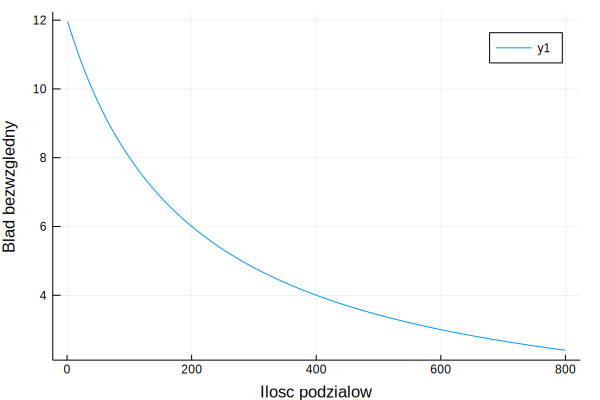

In [53]:
error(trapezoidal, x->4x - 4x^3, 0, 5, 1000, -575)